<a href="https://colab.research.google.com/github/Malikumair786/Machine_Learning/blob/main/Project12_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The project is a regression problem

Workflow:

Data --> Data preprocessing --> Data Analysis -->  Train Test Split --> XGBoostRegressor --> Evaluation

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Analysis

In [53]:
mart_data = pd.read_csv('/content/Train.csv')

In [54]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [55]:
mart_data.shape

(8523, 12)

In [56]:
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:
1. Item_Identifier
2. Item_Fat_Content
3.  Item_Type
4. Outlet_Identifier
5. Outlet_Size
6. Outlet_location_Type
7. Outlet_Type

In [57]:
#Checking for any missing values
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling the missing values:

Mean -> Average Value

Mode --> Most Repeated Value

In [58]:
#Mean Value of 'Item_Weight' column
mart_data['Item_Weight'].mean()

12.857645184135976

In [59]:
#fillig the missing values in Item_Weight column with mean value
mart_data['Item_Weight'].fillna(mart_data['Item_Weight'].mean(),inplace = True)

In [60]:
#Checking for any missing values
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [61]:
# mart_data['Outlet_Size'].fillna(mart_data['Outlet_Size'].mean(),inplace = True)

mode_of_outlet_size = mart_data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type',aggfunc = (lambda x: x.mode()[0]))

In [62]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [63]:
missing_values = mart_data['Outlet_Size'].isnull()

In [64]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [65]:
mart_data.loc[missing_values, 'Outlet_Size'] = mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

In [66]:
mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [67]:
mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

In [68]:
sns.set()  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


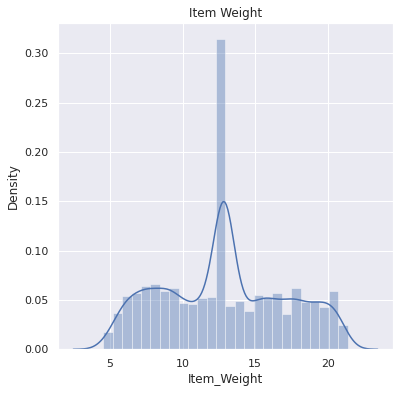

In [69]:
#Item weight distribution
plt.figure(figsize = (6,6))
sns.distplot(mart_data['Item_Weight'])
plt.title("Item Weight")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


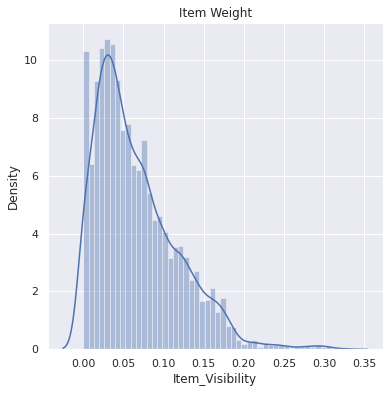

In [70]:
#Item visibility distribution
plt.figure(figsize = (6,6))
sns.distplot(mart_data['Item_Visibility'])
plt.title("Item Weight")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


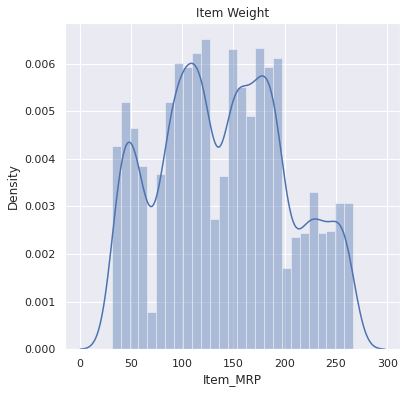

In [71]:
#Item mrp distribution
plt.figure(figsize = (6,6))
sns.distplot(mart_data['Item_MRP'])
plt.title("Item Weight")
plt.show()

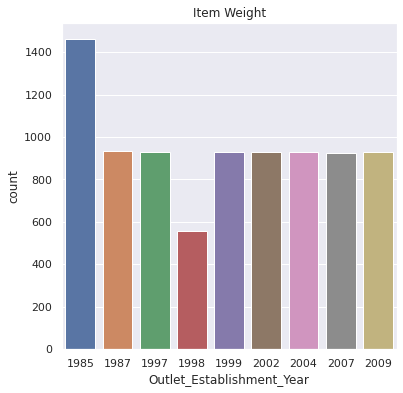

In [72]:
#Item outlet_Establishement Year distribution
plt.figure(figsize = (6,6))
sns.countplot(x = 'Outlet_Establishment_Year', data = mart_data)
plt.title("Item Weight")
plt.show()

Categorical Features

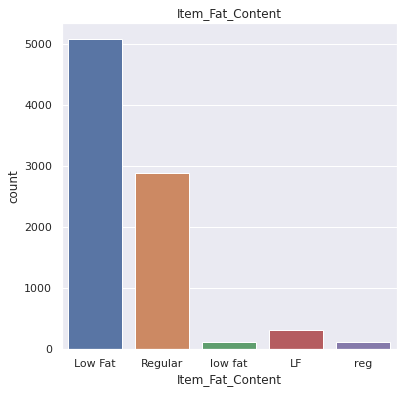

In [73]:
#Item weight distribution
plt.figure(figsize = (6,6))
sns.countplot(x = 'Item_Fat_Content',data = mart_data )
plt.title("Item_Fat_Content")
plt.show()

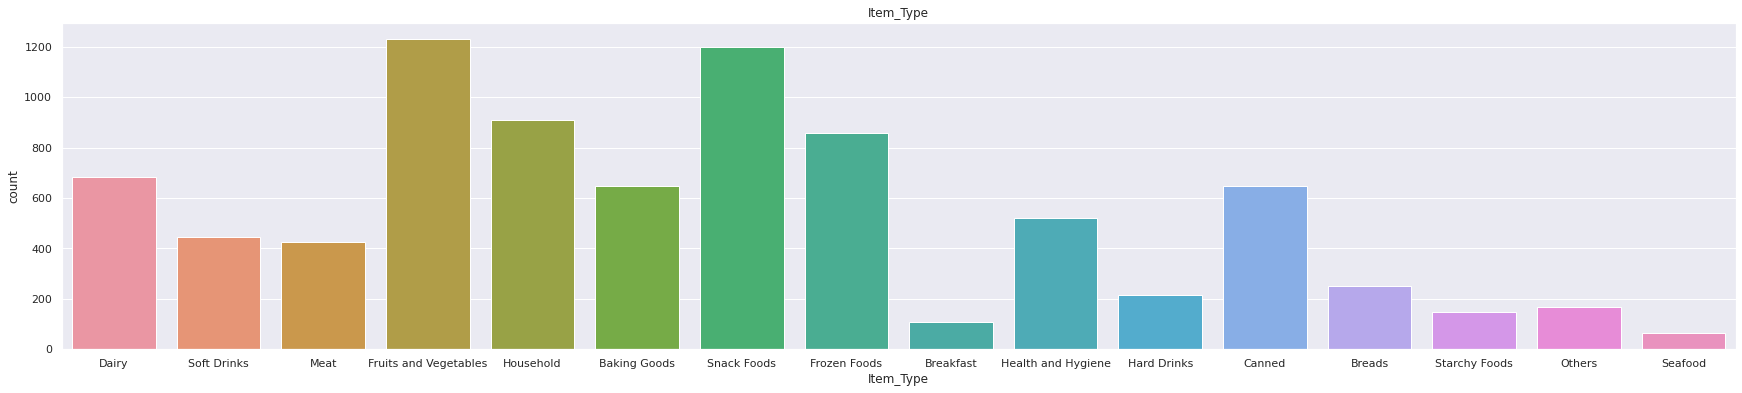

In [74]:
#Item_Type distribution
plt.figure(figsize = (30,6))
sns.countplot(x = 'Item_Type',data = mart_data )
plt.title("Item_Type")
plt.show()

Data Preprocessing

In [75]:
mart_data['Item_Fat_Content'].value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [76]:
mart_data.replace({'Item_Fat_Content':{'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg' : 'Regular'}}, inplace = True)

In [77]:
mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [78]:
#Label Encoding
encoder = LabelEncoder()

In [81]:
mart_data['Item_Identifier'] = encoder.fit_transform(mart_data['Item_Identifier'])

mart_data['Item_Fat_Content'] = encoder.fit_transform(mart_data['Item_Fat_Content'])

mart_data['Item_Type'] = encoder.fit_transform(mart_data['Item_Type'])

mart_data['Outlet_Identifier'] = encoder.fit_transform(mart_data['Outlet_Identifier'])


mart_data['Outlet_Location_Type'] = encoder.fit_transform(mart_data['Outlet_Location_Type'])


mart_data['Outlet_Type'] = encoder.fit_transform(mart_data['Outlet_Type'])


In [82]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,Medium,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,Medium,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,Medium,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,High,2,1,994.7052


In [85]:
#splitting the feature and target
X = mart_data.drop(['Outlet_Size','Item_Outlet_Sales'], axis = 1)

In [86]:
Y = mart_data['Item_Outlet_Sales']

In [87]:
print(X)


      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                 156        9.300  ...                     0            1
1                   8        5.920  ...                     2            2
2                 662       17.500  ...                     0            1
3                1121       19.200  ...                     2            0
4                1297        8.930  ...                     2            1
...               ...          ...  ...                   ...          ...
8518              370        6.865  ...                     2            1
8519              897        8.380  ...                     1            1
8520             1357       10.600  ...                     1            1
8521              681        7.210  ...                     2            2
8522               50       14.800  ...                     0            1

[8523 rows x 10 columns]


In [88]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


Splitting the data into training and testing

In [89]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [90]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 10) (6818, 10) (1705, 10)


ML Model training

XGBoost Regressor

In [91]:
model = XGBRegressor()

In [92]:
model.fit(X_train,Y_train)

[14:52:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation

In [94]:
#prediction on training data
training_data_prediciton = model.predict(X_train)



In [95]:
#R squared Value lie in the range of 0 to 1
r2_train = metrics.r2_score(Y_train, training_data_prediciton)

print("R2 Score value : ",r2_train)


R2 Score value :  0.6366011153339683


In [97]:
#prediction on test data
test_data_prediciton = model.predict(X_test)

#R squared Value lie in the range of 0 to 1
r2_test = metrics.r2_score(Y_test, test_data_prediciton)

print("R2 Score value : ",r2_test)

R2 Score value :  0.5851616813439511
